In [1]:
import pandas as pd 

In [18]:
# 1.1 read data 
filename = 'data/adult.csv'

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss',     'hours-per-week', 'native-country', 'income']

df = pd.read_csv(filename, names= columns)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
print(df.shape)

(32561, 15)


In [12]:
names = list(df.columns)
print(names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [16]:
df.__dict__

{'_is_copy': None,
 '_mgr': BlockManager
 Items: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=32561, step=1)
 NumpyBlock: [ 0  2  4 10 11 12], 6 x 32561, dtype: int64
 NumpyBlock: [ 1  3  5  6  7  8  9 13 14], 9 x 32561, dtype: object,
 '_item_cache': {'income': 0         <=50K
  1         <=50K
  2         <=50K
  3         <=50K
  4         <=50K
            ...  
  32556     <=50K
  32557      >50K
  32558     <=50K
  32559     <=50K
  32560      >50K
  Name: income, Length: 32561, dtype: object},
 '_attrs': {},
 '_flags': <Flags(allows_duplicate_labels=True)>}

income
<=50K    24720
>50K      7841
Name: count, dtype: int64


<Axes: xlabel='income'>

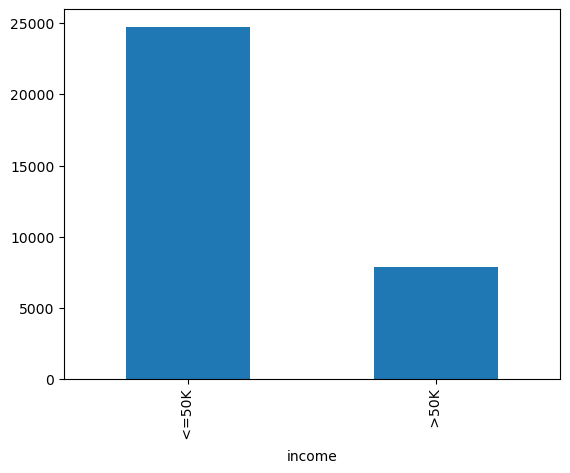

In [15]:
g = df[names[-1]].value_counts()
print(g)
g.plot.bar()

In [ ]:
types = df.dtypes
print(types)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


In [ ]:
# df[" State-gov"].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
for i in range(len(types)):
    if types[i]=='object':
        le.fit_transform(df[names[i]])
        df[names[i]] = le.transform(df[names[i]])

C:\Users\Snape\AppData\Local\Temp\ipykernel_17744\2841098735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local\Temp\ipykernel_17744\2841098735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local\Temp\ipykernel_17744\2841098735.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\Snape\AppData\Local

In [ ]:
data = df.values
print(data[:2])

[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


In [ ]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32560, 14)
(32560,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split \
(X_scaled,y,random_state=42)


In [ ]:
print(len(y_test))

8140


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#kNN = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
kNN = KNeighborsClassifier(n_neighbors=3)

kNN.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = kNN.predict(X_test)# dự đoán 

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5491  666]
 [ 881 1102]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      6157
           1       0.62      0.56      0.59      1983

    accuracy                           0.81      8140
   macro avg       0.74      0.72      0.73      8140
weighted avg       0.80      0.81      0.81      8140



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# prediction 
y_predict = kNN.predict(X_test)

In [ ]:
error = 0
for i in range(len(X_test)):
  #print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
print(error) 

1547
